In [11]:
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import pandas as pd

In [13]:
# 1. Chargement des fichiers CSV
train_df = pd.read_csv('../emnist/emnist-letters-train.csv', header=None)
test_df = pd.read_csv('../emnist/emnist-letters-test.csv', header=None)

# 2. Extraction des étiquettes et des données
y_train = train_df.iloc[:, 0].values - 1  # Ajustement des étiquettes pour qu'elles commencent à 0
x_train = train_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values - 1   # Ajustement des étiquettes pour qu'elles commencent à 0
x_test = test_df.iloc[:, 1:].values


In [15]:
# Vérification des classes
num_classes = len(np.unique(y_train))
print(f'Nombre de classes: {num_classes}')  # Doit être 26 pour EMNIST Letters

Nombre de classes: 26


In [17]:
# 3. Normalisation des images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 4. Reshape pour PCA (aplatir les images)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [19]:
# 5. Application du PCA
n_components = 100
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

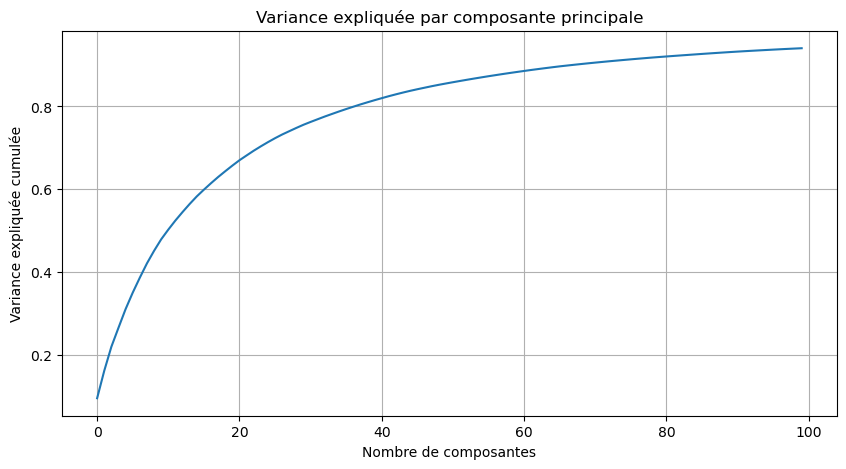

In [21]:
# 6. Visualisation de la variance expliquée
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée par composante principale')
plt.grid(True)
plt.show()

In [23]:

# 7. Préparation des données pour le CNN
# Reshape pour le format attendu par le CNN
x_train_pca_reshaped = x_train_pca.reshape(-1, 10, 10, 1)  # Reshape en 10x10 pour les 100 composantes
x_test_pca_reshaped = x_test_pca.reshape(-1, 10, 10, 1)

# 8. Création et entraînement du CNN
model = models.Sequential([
    layers.Input(shape=(10, 10, 1)),  # Utilisation d'Input layer recommandé
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ajustement du nombre de classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 9. Affichage du résumé du modèle
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 32)            │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,954 (144.35 KB)

 Trainable params: 36,954 (144.35 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# 10. Entraînement du modèle
history = model.fit(x_train_pca_reshaped, y_train, 
                   epochs=10, 
                   validation_data=(x_test_pca_reshaped, y_test))

# 11. Évaluation du modèle
test_loss, test_acc = model.evaluate(x_test_pca_reshaped, y_test)
print(f'\nPrécision sur l\'ensemble de test: {test_acc:.4f}')

Epoch 1/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.4911 - loss: 1.7639 - val_accuracy: 0.7132 - val_loss: 0.9347
Epoch 2/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7628 - loss: 0.7810 - val_accuracy: 0.7673 - val_loss: 0.7555
Epoch 3/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8057 - loss: 0.6390 - val_accuracy: 0.7774 - val_loss: 0.7111
Epoch 4/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8266 - loss: 0.5642 - val_accuracy: 0.7926 - val_loss: 0.6679
Epoch 5/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8383 - loss: 0.5185 - val_accuracy: 0.7930 - val_loss: 0.6507
Epoch 6/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8481 - loss: 0.4815 - val_accuracy: 0.8099 - val_loss: 0.6070
Epoch 7/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8545 - loss: 0.4585 - val_accuracy: 0.8116 - val_loss: 0.6189
Epoch 8/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8600 - loss: 0

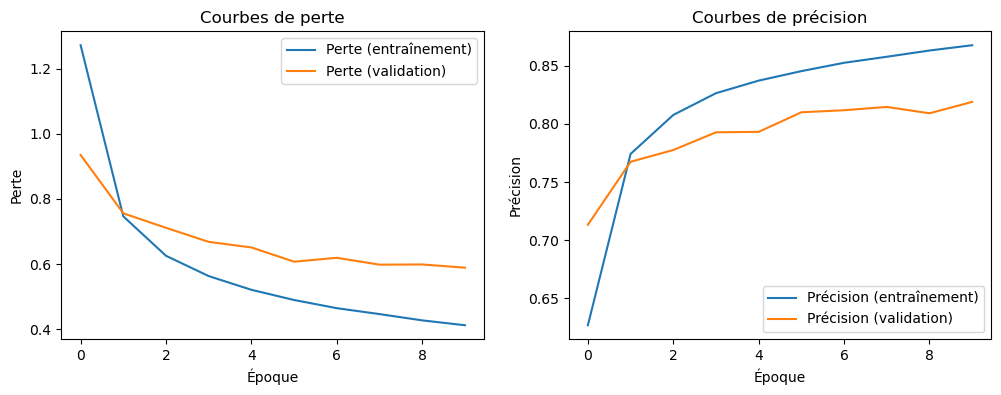

In [27]:
# 12. Visualisations des courbes d'apprentissage
plt.figure(figsize=(12, 4))
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte (entraînement)')
plt.plot(history.history['val_loss'], label='Perte (validation)')
plt.title('Courbes de perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()
# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Précision (entraînement)')
plt.plot(history.history['val_accuracy'], label='Précision (validation)')
plt.title('Courbes de précision')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.show()

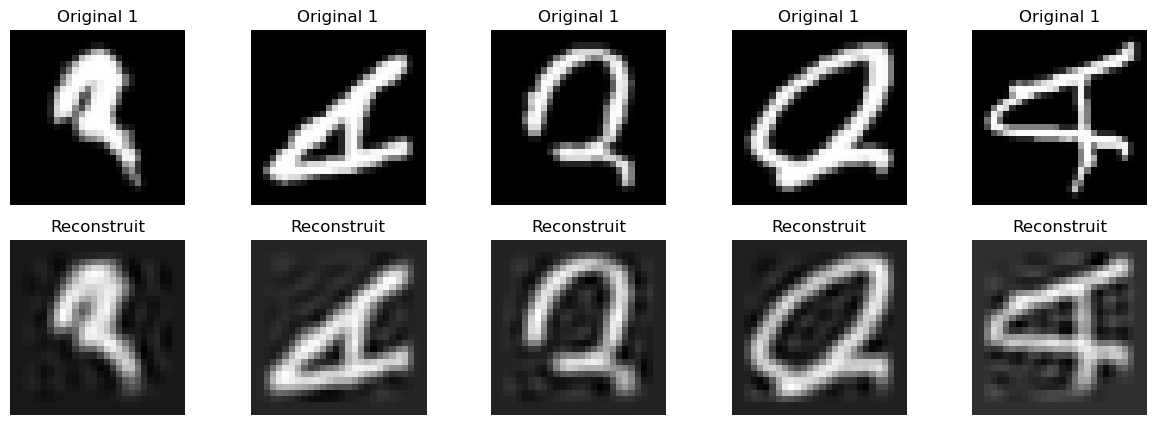

In [29]:
# 13. Visualisation des images avant/après PCA
plt.figure(figsize=(15, 5))
for i in range(5):
    # Image originale
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Reshape pour affichage
    plt.title(f'Original {y_test[i]+1}')  # Ajustement pour afficher la classe originale
    plt.axis('off')
    
    # Image reconstruite
    reconstructed = pca.inverse_transform(x_test_pca[i]).reshape(28, 28)
    plt.subplot(2, 5, i+6)
    plt.imshow(reconstructed, cmap='gray')
    plt.title('Reconstruit')
    plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


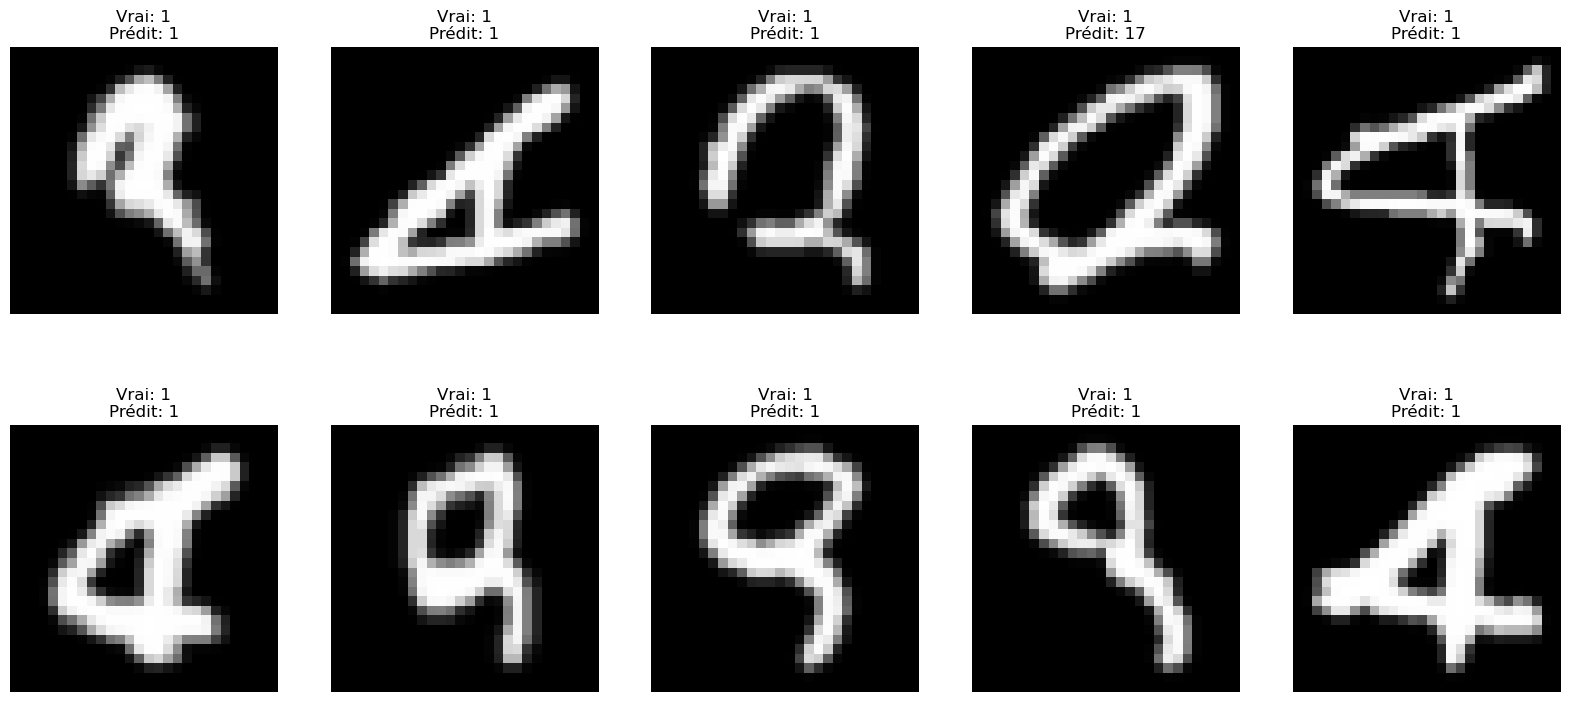

In [47]:
# 14. Prédictions sur un échantillon de test
n_samples =10
predictions = model.predict(x_test_pca_reshaped[:n_samples])
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(20, 9))
for i in range(n_samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Reshape pour affichage
    plt.title(f'Vrai: {y_test[i]+1}\nPrédit: {predicted_classes[i]+1}')  # Ajustement des classes
    plt.axis('off')
plt.show()